# 1.Tracker

*Made by David Serrano for his Final Bachelor Thesis*


This file analyzes the video sequences, finds candidates of HotSpots, track them and links them in the neighboring frames and permits labeling them manually between NoHotSpot, HotSpot and Anomaly to later on implement a classifier to do it automatically.

*IMPORTANT:*

As the labeling has to be done for all the sequences and it takes an extremely long and tedious time to do it, in this notebook will only be shown for one sequence and a few track candidates. Moreover, in the *data/tracker_presentation* folder will be stored all the files which are extracted from this notebook.


## 1.1. Environment Preparation

In [ ]:
# Useful general imports
from google.colab import drive 

In [ ]:
# mount the google drive folder to access to all the files in there
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Add the folder called utils that has all the custom modules in .py files
import sys
sys.path.append('/content/drive/MyDrive/TFG/utils')

In [ ]:
# Example Sequence Selected
EXAMPLE_FILE = '20171207.039_AEQ11'

In [ ]:
from paths import PROJECT_ROOT, HDF5_FOLDER, JSON_FOLDER

## 1.2. Detect the candidates

In this section, the code analyzes the example sequence finding all the detections which are prospective HotSpot candidates.

For each file, it creates a **SequenceAnalyzer** object passing as parameters the path and the timestamps of the file. When the previous mentioned object is initialized, the whole sequence is loaded, as well as its Dark Image (image to mitigate the fixed patterns noise of the sensors under low light conditions with long
sensor exposure times)

Then, the function *sequenceAnalyzer.processSequence()* is called. This function creates a **hotSpotDetector** object and a **tracker** object. 

For each frame of the seuqence the function *hotSpotDetector.detectHotSpot()* finds connected bright components using:

1. Top Hat Transform (*hotSpotDetector.applyTopHat()*)
2. Otsu Binarization or Thresholding Method (*applyOtsu()*)
3. Subtract the background (**background_substractor**)
4. Thresholding, morphological opening and morphological closing to the background substracted image (*hotSpotDetector.process_image()*)
5. With a non maxima suppression algorithm to merge similar zones get the detections (*hotSpotDetector.get_detections()*)
6. Return the Bounding Boxes of the detections and the binarized image. For this demonstration only a few images will be returned to avoid collapsing the notebook's output.

For each frame too, the **tracker** object deals with the previous and actual frame candidates to link them using:

1. Updating the detections from the actual frame (*tracker.update()*)
2. If there exists a detection from the  previous 50 frames with less than 10 pixels of displacement, link them as the same track and update the new position. If not, add the new track to the list of tracks.

At the end we obtain a detection array in which all the detections are stored in a JSON file in the *data/tracker_presentation* folder with the following format:

[frame number, trackID, xmin, ymin, xmax, ymax, 1]

The *tracker* object is also stored in */models*. 




In [ ]:
# custom imports
from archive import getTimestamps
from sequenceAnalyzer import sequenceAnalyzer
from os import walk
from image_tools import showImage

import time

for (dirpath, dirnames, filenames) in walk(HDF5_FOLDER):
    for file in filenames:
        # if file.endswith('.h5'):
        if file == (EXAMPLE_FILE + '.h5'): 

            t = time.time()

            print(file)
            sourceFile =  HDF5_FOLDER + file

            # Get the timestamps
            [T1, T4, T4e] = getTimestamps(file)

            # Create sequenceAnalyzer object
            sequenceProcessor = sequenceAnalyzer(sourceFile, T1, T4, T4e)

            print('Analyzing video sequence...')
            json_path = PROJECT_ROOT + '/data/tracker_presentation/'
            trackerObject_path = PROJECT_ROOT + '/models/'
            classify = False
            image = sequenceProcessor.processSequence(jsonPath=json_path,
                                              modelPath=trackerObject_path,
                                              showBinarized = True,
                                              trackDetections = True,
                                              classifyDetections= classify)
                     
            elapsed = time.time() - t

            print('Elapsed time: {}'.format(elapsed))



20171207.039_AEQ11.h5
Loading sequence file...
Elapsed time reading: 97.69872236251831
Computing Dark image...
Elapsed time computing dark image: 4.419139623641968
Computing Dark image...
Elapsed time computing dark image: 2.2848119735717773
Analyzing video sequence...
Processing Sequence image...


Deregistering object 0 after 50 frames
Deregistering object 1 after 50 frames
Deregistering object 2 after 50 frames
Deregistering object 3 after 50 frames
Deregistering object 4 after 50 frames
Deregistering object 5 after 50 frames
Deregistering object 9 after 50 frames
Deregistering object 10 after 50 frames
Deregistering object 11 after 50 frames
Deregistering object 12 after 50 frames
Deregistering object 8 after 50 frames
Deregistering object 6 after 50 frames
Deregistering object 7 after 50 frames
Image returned from the frame 350
Deregistering object 33 after 50 frames
Deregistering object 25 after 50 frames
Deregistering object 26 after 50 frames
Deregistering object 14 after 50 frames
Deregistering object 36 after 50 frames
Deregistering object 30 after 50 frames
Deregistering object 35 after 50 frames
Deregistering object 27 after 50 frames
Deregistering object 28 after 50 frames
Deregistering object 23 after 50 frames
Deregistering object 13 after 50 frames
Deregistering ob

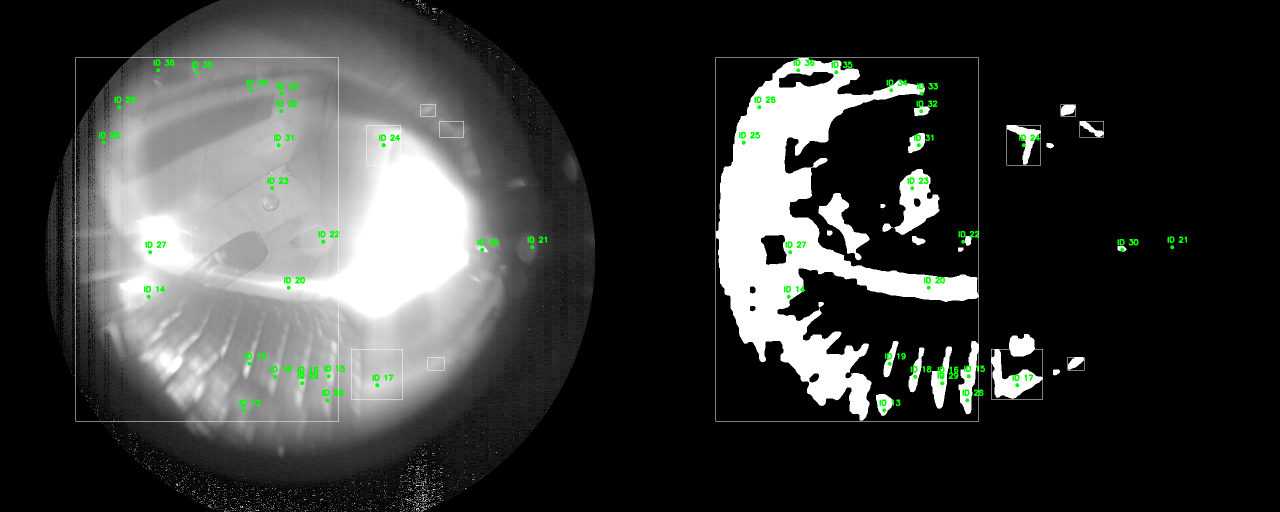

In [ ]:
from image_tools import showImage
showImage(image)

Now let's show how are the detections stored

In [ ]:
from JSONLoader import loadData

show_path = PROJECT_ROOT + '/data/trackerPresentation/20171207.039_AEQ11.h5_track.json'
detections = loadData(show_path)

for d in detections[:100]:
    print(d)

[1, 0, 771, 502, 874, 761, 0]
[2, 0, 771, 502, 874, 761, 0]
[3, 0, 771, 502, 874, 761, 0]
[4, 0, 771, 502, 874, 761, 0]
[5, 0, 771, 502, 874, 761, 0]
[6, 0, 771, 502, 874, 761, 0]
[7, 0, 771, 502, 874, 761, 0]
[8, 0, 771, 502, 874, 761, 0]
[9, 0, 771, 502, 874, 761, 0]
[10, 0, 771, 502, 874, 761, 0]
[11, 0, 771, 502, 874, 761, 0]
[12, 0, 771, 502, 874, 761, 0]
[13, 0, 771, 502, 874, 761, 0]
[14, 0, 771, 502, 874, 761, 0]
[15, 0, 771, 502, 874, 761, 0]
[16, 0, 771, 502, 874, 761, 0]
[17, 0, 771, 502, 874, 761, 0]
[18, 0, 771, 502, 874, 761, 0]
[19, 0, 771, 502, 874, 761, 0]
[20, 0, 771, 502, 874, 761, 0]
[21, 0, 771, 502, 874, 761, 0]
[22, 0, 771, 502, 874, 761, 0]
[23, 0, 771, 502, 874, 761, 0]
[24, 0, 771, 502, 874, 761, 0]
[25, 0, 771, 502, 874, 761, 0]
[26, 0, 771, 502, 874, 761, 0]
[27, 0, 771, 502, 874, 761, 0]
[28, 0, 771, 502, 874, 761, 0]
[29, 0, 771, 502, 874, 761, 0]
[30, 0, 771, 502, 874, 761, 0]
[31, 0, 771, 502, 874, 761, 0]
[32, 0, 771, 502, 874, 761, 0]
[33, 0, 771, 502,

We can see that the first track lasts 53 frames and its Bounding Box is static and the seconf track also starts in the first frame.

## 1.3 Label the tracks

The following block, loads the object **tracker** stored in the previous section and permits labeling the tracks manually. Then another JSON file is stored, but this time with the correct labels in the sixth position. 

As this notebook is a demo, only the first two tracks will be labeled. To do that, the code displays four images of the same track along the frames.

20171207.039_AEQ11.h5


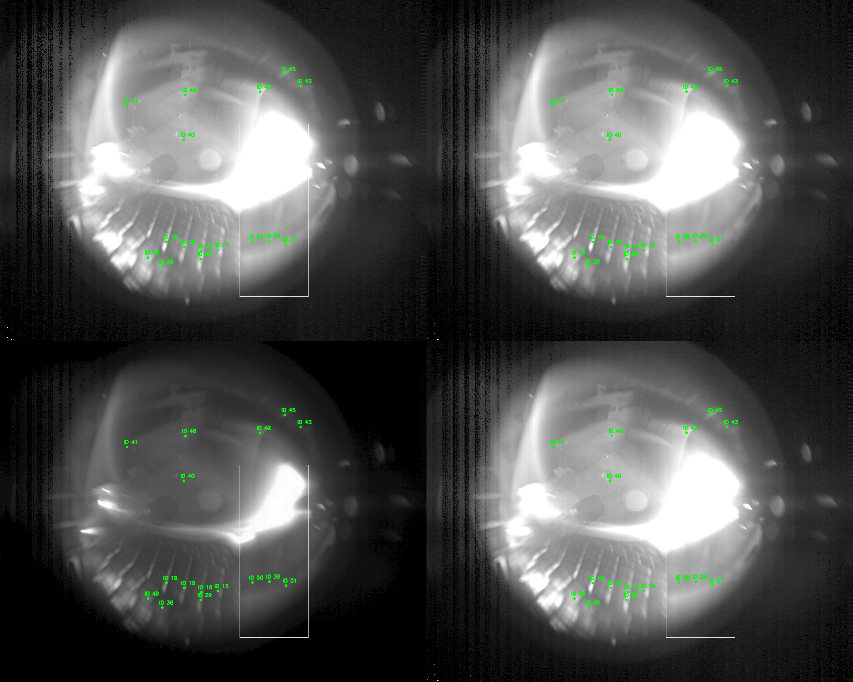

Track: 1, of a total of 52 tracks
Detected Object with ID: 0
Anomaly? None == not fund; a == anomaly, other == HotSpot
not found


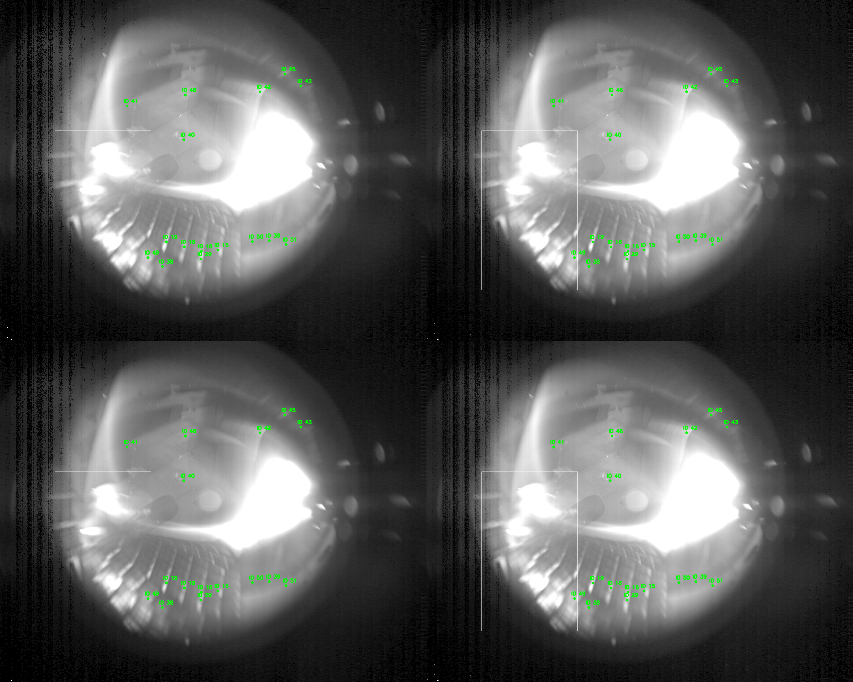

Track: 2, of a total of 52 tracks
Detected Object with ID: 1
Anomaly? None == not fund; a == anomaly, other == HotSpota
anomaly


In [ ]:
from os import walk
from tracker import objectTracker
from image_tools import rescaleImage, adjustGamma, plotBBoxes, showImage
from JSONLoader import saveData

import joblib
import numpy as np
import cv2

tracks = 0
dets = 0
for (dirpath, dirnames, filenames) in walk(HDF5_FOLDER):
    for file in filenames:
        # if file.endswith('.h5')
        if file == EXAMPLE_FILE + '.h5':

            t = time.time()

            print(file)
            sourceFile = HDF5_FOLDER + file

            # Load sequence tracker

            trackername = PROJECT_ROOT + '/models/' + 'tracker.joblib'

            # File in which the characteristics of each track will be stored
            filename = PROJECT_ROOT + '/data/trackerPresentation/labeledTest' + file + '.json' 

            # Original: if not os.path.exists(filename):
            tracker = joblib.load(trackername)

            #Obtain thumbnail image
            maxImage = tracker.trackableObjects[0].imageThumbnail
            max = np.percentile(maxImage, 95)
            maxImage = rescaleImage(maxImage, colormap_max=max)
            maxImage = adjustGamma(maxImage, 2)
            dataset = []
            nTracks = len(tracker.trackableObjects)
            tracks = 0

            # Original: for objectID in sorted(tracker.trackableObjects.keys()):
            # Only the first two tracks
            for objectID in range(2):

                tracks = tracks + 1
                trackData = tracker.trackableObjects[objectID]
                detections = []

                #Resize detection
                increaseFactor = 0.5
                detection = trackData.characteristics[-1][1]
                x1 = detection[0]
                y1 = detection[1]
                x2 = detection[2]
                y2 = detection[3]
                w = x2 - x1
                h = y2 - y1
                x1 = np.min([1280,np.max( [0,int(x1 - increaseFactor * w)])])
                y1 = np.min([1024,np.max( [0,int(y1 - increaseFactor * h)])])
                x2 = np.min([1280,np.max( [0,int(x2 + increaseFactor * w)])])
                y2 = np.min([1024,np.max( [0,int(y2 + increaseFactor * h)])])
                detection = [x1,y1,x2,y2]

                detections.append(detection)

                #Obtain Track Thumbnail
                trackThumbnail = trackData.imageThumbnail
                max = np.percentile(trackThumbnail, 95)
                trackThumbnail = rescaleImage(trackThumbnail, colormap_max=max)
                trackThumbnail = adjustGamma(trackThumbnail, 2)

                #Obtain Track Enhanced
                trackThumbnailEnhanced = trackData.imageThumbnail
                croppedImage = trackThumbnailEnhanced[y1: y2, x1: x2]
                max = np.percentile(croppedImage, 95)
                min = np.min(croppedImage)
                trackThumbnailEnhanced = rescaleImage(trackThumbnailEnhanced,colormap_min=min, colormap_max=max)
                trackThumbnailEnhanced = adjustGamma(trackThumbnailEnhanced, 2)

                #Plot centroid and BBox
                trackThumbnail = tracker.plotTracks(trackThumbnail)
                trackThumbnail = plotBBoxes(trackThumbnail, detections)
                visualizeImage = tracker.plotTracks(maxImage)
                visualizeImage = plotBBoxes(visualizeImage, detections)
                trackThumbnailEnhanced = tracker.plotTracks(trackThumbnailEnhanced)
                trackThumbnailEnhanced= plotBBoxes(trackThumbnailEnhanced, detections)

                #Stack Thumbnails
                imageStacked1 = np.hstack((visualizeImage, trackThumbnail))
                imageStacked2= np.hstack((trackThumbnailEnhanced, visualizeImage))
                imageStacked = np.vstack((imageStacked1, imageStacked2))
                imageStacked = cv2.resize(imageStacked,
                                            (int(imageStacked.shape[1] / 3),
                                            int(imageStacked.shape[0] / 3)))
                showImage(imageStacked)

                print('Track: {0}, of a total of {1} tracks'.format(tracks, nTracks))
                print('Detected Object with ID: {}'.format(objectID))
                # sleep to avoid the notebook crashing
                time.sleep(3)
                value = input("Anomaly? None == not fund; a == anomaly, other == HotSpot")
                anomaly = False
                hotSpot = False
                # Mark as anomaly detections labaled with value diferent than 0
                if value != "":
                    anomaly = True
                    if value != 'a':
                        hotSpot = True
                        print('hot spot')
                    else:
                        print('anomaly')
                else:
                    print ('not found')

                for element in trackData.characteristics:
                    frameID = element[0]
                    detection = element[1]
                    characteristics = element[2]

                    if anomaly:

                        if hotSpot:
                            #1 --> Hot Spot
                            blobCharacteristics = [frameID, objectID,
                                                detection[0], detection[1], detection[2], detection[3],
                                                1]
                        else:
                            # 2 --> anomaly
                            blobCharacteristics = [frameID, objectID,
                                                    detection[0], detection[1], detection[2], detection[3],
                                                    2]

                    else:
                        # 0 --> No Hot Spot / anomaly
                        blobCharacteristics = [frameID, objectID,
                                                detection[0], detection[1], detection[2], detection[3],
                                                0]

                    if characteristics != []:
                        for characteristic in characteristics:
                            blobCharacteristics.append(characteristic)

                    dataset.append(blobCharacteristics)

            saveData(filename, dataset)